In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
from helper_fn import data_import, relabel

In [2]:
from tensorflow.keras.models import load_model

In [3]:
test_path='./Group_10/test'
train_path='./Group_10/train'
val_path='./Group_10/val'

#import datasets
train_data, train_labels = data_import(train_path)
test_data, test_labels = data_import(test_path)
val_data, val_labels = data_import(val_path)

train_data = train_data.reshape(-1, 784)/255.0
test_data = test_data.reshape(-1, 784)/255.0
val_data = val_data.reshape(-1, 784)/255.0

train_labels = relabel(train_labels)
test_labels = relabel(test_labels)
val_labels = relabel(val_labels)

mean_vec = np.mean(train_data, axis=0) # 784 dimentional vector
# print(mean_vec.shape) 

# mean correction
train_data = train_data - mean_vec
test_data = test_data - mean_vec
val_data = val_data - mean_vec

# PCA Task1

In [11]:
with open("./pca_models/pca32.pkl", mode="rb") as f:
    pca32 = pickle.load(f)

reduced_train = pca32.transform(train_data)
reduced_test = pca32.transform(test_data)
reduced_val = pca32.transform(val_data)

In [14]:
model = load_model("./pca_models/pcamodel1_32.h5")
model.summary()
print("Train data eval:")
print(model.evaluate(reduced_train, train_labels))

print("Test data eval:")
print(model.evaluate(reduced_test, test_labels))

print("Val data eval:")
print(model.evaluate(reduced_val, val_labels))



Model: "Model-PCA32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 32)]              0         
                                                                 
 Layer1 (Dense)              (None, 16)                528       
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________
Train data eval:
356/356 [==============================] - 0s 254us/step - loss: 0.0068 - accuracy: 0.9987
[0.006802352145314217, 0.9986824989318848]
Test data eval:
119/119 [=============

In [15]:
model = load_model("./pca_models/pcamodel2_32.h5")
model.summary()
print("Train data eval:")
print(model.evaluate(reduced_train, train_labels))

print("Test data eval:")
print(model.evaluate(reduced_test, test_labels))

print("Val data eval:")
print(model.evaluate(reduced_val, val_labels))


Model: "Model-PCA32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 32)]              0         
                                                                 
 Layer1 (Dense)              (None, 256)               8448      
                                                                 
 Layer2 (Dense)              (None, 128)               32896     
                                                                 
 Layer3 (Dense)              (None, 64)                8256      
                                                                 
 Layer4 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 5)                 165       
                                                                 
Total params: 51,845
Trainable params: 51,845
Non-train

## 64 PCA

In [55]:
with open("./pca_models/pca64.pkl", mode="rb") as f:
    pca64 = pickle.load(f)

reduced_train = pca64.transform(train_data)
reduced_test = pca64.transform(test_data)
reduced_val = pca64.transform(val_data)

In [7]:
model = load_model("./pca_models/pcamodel1_64.h5")
model.summary()
print("Train data eval:")
print(model.evaluate(reduced_train, train_labels))

print("Test data eval:")
print(model.evaluate(reduced_test, test_labels))

print("Val data eval:")
print(model.evaluate(reduced_val, val_labels))



Model: "Model-PCA64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 64)]              0         
                                                                 
 Layer1 (Dense)              (None, 16)                1040      
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________
Train data eval:
356/356 [==============================] - 0s 255us/step - loss: 0.0059 - accuracy: 0.9989
[0.005892763379961252, 0.9989460110664368]
Test data eval:
119/119 [=========

In [56]:
model = load_model("./pca_models/pcamodel2_64.h5")
model.summary()
print("Train data eval:")
print(model.evaluate(reduced_train, train_labels))

print("Test data eval:")
print(model.evaluate(reduced_test, test_labels))

print("Val data eval:")
print(model.evaluate(reduced_val, val_labels))

Model: "Model-PCA64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 64)]              0         
                                                                 
 Layer1 (Dense)              (None, 256)               16640     
                                                                 
 Layer2 (Dense)              (None, 128)               32896     
                                                                 
 Layer3 (Dense)              (None, 64)                8256      
                                                                 
 Layer4 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 5)                 165       
                                                                 
Total params: 60,037
Trainable params: 60,037
Non-train

## 128 PCA

In [57]:
with open("./pca_models/pca128.pkl", mode="rb") as f:
    pca128 = pickle.load(f)

reduced_train = pca128.transform(train_data)
reduced_test = pca128.transform(test_data)
reduced_val = pca128.transform(val_data)

In [58]:
model = load_model("./pca_models/pcamodel1_128.h5")
model.summary()

print("Train data eval:")
print(model.evaluate(reduced_train, train_labels))

print("Test data eval:")
print(model.evaluate(reduced_test, test_labels))

print("Val data eval:")
print(model.evaluate(reduced_val, val_labels))


Model: "Model-PCA128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 128)]             0         
                                                                 
 Layer1 (Dense)              (None, 16)                2064      
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 2,245
Trainable params: 2,245
Non-trainable params: 0
_________________________________________________________________
Train data eval:
356/356 [==============================] - 0s 262us/step - loss: 0.3860 - accuracy: 0.9136
[0.38601988554000854, 0.9135704636573792]
Test data eval:
119/119 [=========

In [59]:
model = load_model("./pca_models/pcamodel2_128.h5")
model.summary()

print("Train data eval:")
print(model.evaluate(reduced_train, train_labels))

print("Test data eval:")
print(model.evaluate(reduced_test, test_labels))

print("Val data eval:")
print(model.evaluate(reduced_val, val_labels))


Model: "Model-PCA128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 128)]             0         
                                                                 
 Layer1 (Dense)              (None, 256)               33024     
                                                                 
 Layer2 (Dense)              (None, 128)               32896     
                                                                 
 Layer3 (Dense)              (None, 64)                8256      
                                                                 
 Layer4 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 5)                 165       
                                                                 
Total params: 76,421
Trainable params: 76,421
Non-trai

## 256 PCA

In [60]:
with open("./pca_models/pca256.pkl", mode="rb") as f:
    pca256 = pickle.load(f)

reduced_train = pca256.transform(train_data)
reduced_test = pca256.transform(test_data)
reduced_val = pca256.transform(val_data)

In [61]:
model = load_model("./pca_models/pcamodel1_256.h5")
model.summary()

print("Train data eval:")
print(model.evaluate(reduced_train, train_labels))

print("Test data eval:")
print(model.evaluate(reduced_test, test_labels))

print("Val data eval:")
print(model.evaluate(reduced_val, val_labels))


Model: "Model-PCA256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 256)]             0         
                                                                 
 Layer1 (Dense)              (None, 16)                4112      
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 4,293
Trainable params: 4,293
Non-trainable params: 0
_________________________________________________________________
Train data eval:
356/356 [==============================] - 0s 257us/step - loss: 0.4986 - accuracy: 0.8796
[0.49864867329597473, 0.8795784115791321]
Test data eval:
119/119 [=========

In [63]:
model = load_model("./pca_models/pcamodel2_256.h5")
model.summary()

print("Train data eval:")
print(model.evaluate(reduced_train, train_labels))

print("Test data eval:")
print(model.evaluate(reduced_test, test_labels))

print("Val data eval:")
print(model.evaluate(reduced_val, val_labels))


Model: "Model-PCA256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 256)]             0         
                                                                 
 Layer1 (Dense)              (None, 256)               65792     
                                                                 
 Layer2 (Dense)              (None, 128)               32896     
                                                                 
 Layer3 (Dense)              (None, 64)                8256      
                                                                 
 Layer4 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 5)                 165       
                                                                 
Total params: 109,189
Trainable params: 109,189
Non-tr

# Autoencoders

In [47]:
test_path='./Group_10/test'
train_path='./Group_10/train'
val_path='./Group_10/val'

#import datasets
train_data, train_labels = data_import(train_path)
test_data, test_labels = data_import(test_path)
val_data, val_labels = data_import(val_path)

train_data = train_data.reshape(-1, 784)/255.0
test_data = test_data.reshape(-1, 784)/255.0
val_data = val_data.reshape(-1, 784)/255.0

train_labels = relabel(train_labels)
test_labels = relabel(test_labels)
val_labels = relabel(val_labels)

# mean_vec = np.mean(train_data, axis=0) # 784 dimentional vector
# print(mean_vec.shape) 

## One layer 32 bottleneck

In [81]:
model = load_model("./autoencoder_models/autoencoder_1layer_32.h5")

In [65]:
class1 = train_data[0, :]
class2 = train_data[2277+100, :]
class3 = train_data[2*2277+100, :]
class4 = train_data[3*2277+100, :]
class5 = train_data[4*2277+100, :]

Model: "Autoencoder32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Bottleneck-layer (Dense)    (None, 32)                25120     
                                                                 
 Decoder-output (Dense)      (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 8ms/step


(-0.5, 27.5, 27.5, -0.5)

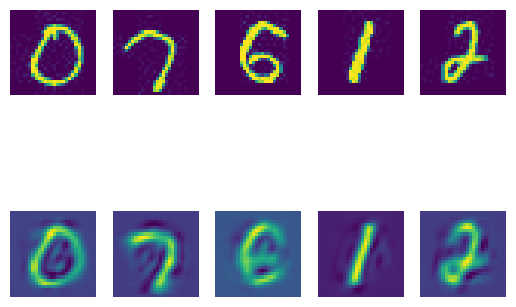

In [82]:
model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')

## Three layer 32 bottleneck

In [83]:
model = load_model("./autoencoder_models/autoencoder_3layer_32.h5")

Model: "Autoencoder32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Encoder-hidden (Dense)      (None, 400)               314000    
                                                                 
 Bottleneck-layer (Dense)    (None, 32)                12832     
                                                                 
 Decoder-hidden (Dense)      (None, 400)               13200     
                                                                 
 Decoder-output (Dense)      (None, 784)               314384    
                                                                 
Total params: 654,416
Trainable params: 654,416
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 10ms/

(-0.5, 27.5, 27.5, -0.5)

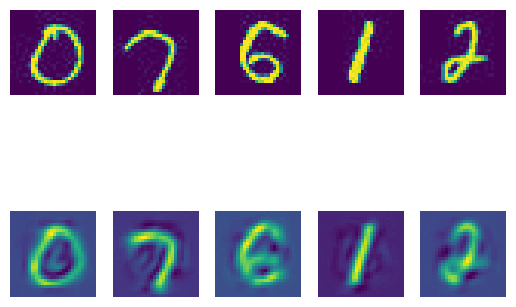

In [84]:
model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')

## One layer 64 bottleneck

In [85]:
model = load_model("./autoencoder_models/autoencoder_1layer_64.h5")

Model: "Autoencoder64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Bottleneck-layer (Dense)    (None, 64)                50240     
                                                                 
 Decoder-output (Dense)      (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 8ms/step


(-0.5, 27.5, 27.5, -0.5)

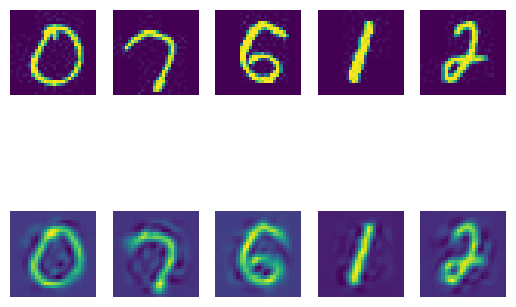

In [86]:
model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')

## Three layer 64 bottleneck

In [87]:
model = load_model("./autoencoder_models/autoencoder_3layer_64.h5")

Model: "Autoencoder64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Encoder-hidden (Dense)      (None, 400)               314000    
                                                                 
 Bottleneck-layer (Dense)    (None, 64)                25664     
                                                                 
 Decoder-hidden (Dense)      (None, 400)               26000     
                                                                 
 Decoder-output (Dense)      (None, 784)               314384    
                                                                 
Total params: 680,048
Trainable params: 680,048
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 8ms/s

(-0.5, 27.5, 27.5, -0.5)

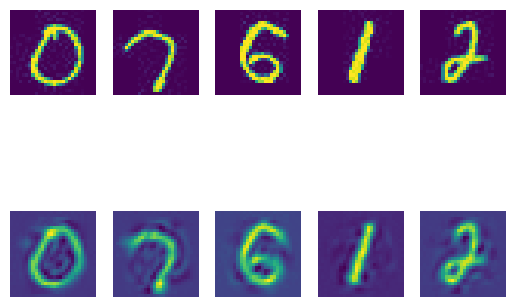

In [88]:
model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')

## One layer 128 bottleneck

In [89]:
model = load_model("./autoencoder_models/autoencoder_1layer_128.h5")

Model: "Autoencoder128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Bottleneck-layer (Dense)    (None, 128)               100480    
                                                                 
 Decoder-output (Dense)      (None, 784)               101136    
                                                                 
Total params: 201,616
Trainable params: 201,616
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 8ms/step


(-0.5, 27.5, 27.5, -0.5)

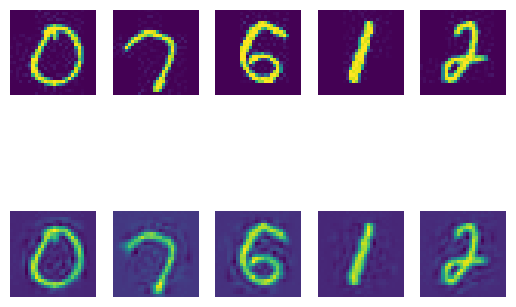

In [90]:
model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')

## Three layer 128 bottleneck

In [93]:
model = load_model("./autoencoder_models/autoencoder_3layer_128.h5")

Model: "Autoencoder128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Encoder-hidden (Dense)      (None, 400)               314000    
                                                                 
 Bottleneck-layer (Dense)    (None, 128)               51328     
                                                                 
 Decoder-hidden (Dense)      (None, 400)               51600     
                                                                 
 Decoder-output (Dense)      (None, 784)               314384    
                                                                 
Total params: 731,312
Trainable params: 731,312
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 9ms/

(-0.5, 27.5, 27.5, -0.5)

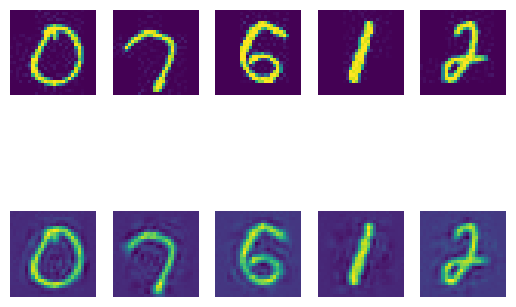

In [94]:
model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')

## One layer 256 bottleneck

In [69]:
model = load_model("./autoencoder_models/autoencoder_1layer_256.h5")

Model: "Autoencoder256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Bottleneck-layer (Dense)    (None, 256)               200960    
                                                                 
 Decoder-output (Dense)      (None, 784)               201488    
                                                                 
Total params: 402,448
Trainable params: 402,448
Non-trainable params: 0
_________________________________________________________________


Model: "Autoencoder128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Bottleneck-layer (Dense)    (None, 128)               100480    
                                                                 
 Decoder-output (Dense)      (None, 784)               101136    
                                                                 
Total params: 201,616
Trainable params: 201,616
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 8ms/step


(-0.5, 27.5, 27.5, -0.5)

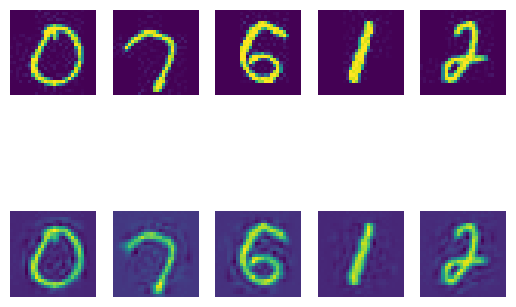

In [91]:
model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')

## Three layer 256 bottleneck

In [95]:
model = load_model("./autoencoder_models/autoencoder_3layer_256.h5")

Model: "Autoencoder256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Encoder-hidden (Dense)      (None, 400)               314000    
                                                                 
 Bottleneck-layer (Dense)    (None, 256)               102656    
                                                                 
 Decoder-hidden (Dense)      (None, 400)               102800    
                                                                 
 Decoder-output (Dense)      (None, 784)               314384    
                                                                 
Total params: 833,840
Trainable params: 833,840
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 10ms

(-0.5, 27.5, 27.5, -0.5)

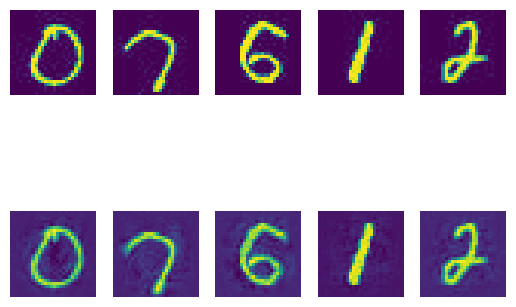

In [96]:
model.summary()

plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)))
plt.axis('off')

In [109]:
encoder = load_model("./autoencoder_models/encoder_3layer_256.h5")
encoder.summary()

Model: "Encoder256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Encoder-hidden (Dense)      (None, 400)               314000    
                                                                 
 Bottleneck-layer (Dense)    (None, 256)               102656    
                                                                 
Total params: 416,656
Trainable params: 416,656
Non-trainable params: 0
_________________________________________________________________


In [98]:
encoder.compile()

In [105]:
encoded = encoder.predict(train_data)

356/356 [==============================] - 0s 461us/step


In [106]:
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [122]:
inputs = Input(shape=(256,), name="Input")
x = Dense(16, activation='tanh', name="Layer1")(inputs)
x = Dense(8, activation='tanh', name="Layer2")(x)
# x = Dense(128, activation='tanh', name="Layer3")(x)
# x = Dense(64, activation='tanh', name="Layer4")(x)
outputs = Dense(5, activation='softmax', name="Output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"Model-encoder{256}")
model.summary()

Model: "Model-encoder256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 256)]             0         
                                                                 
 Layer1 (Dense)              (None, 16)                4112      
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 4,293
Trainable params: 4,293
Non-trainable params: 0
_________________________________________________________________


In [126]:
adam_optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer=adam_optimizer,
                    loss="sparse_categorical_crossentropy",
                    metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                        min_delta=1e-4,
                                        patience=5,
                                        verbose=1)
history1 = model.fit(x=encoded, y=train_labels,
                        batch_size=32, epochs=100_000,
                        callbacks=[earlystopping],
                        verbose=1, shuffle=True,
                        validation_split=0.0)

Epoch 1/100000
356/356 [==============================] - 0s 334us/step - loss: 1.8345 - accuracy: 0.7246
Epoch 2/100000
356/356 [==============================] - 0s 320us/step - loss: 0.4003 - accuracy: 0.9151
Epoch 3/100000
356/356 [==============================] - 0s 326us/step - loss: 0.2485 - accuracy: 0.9448
Epoch 4/100000
356/356 [==============================] - 0s 320us/step - loss: 0.1736 - accuracy: 0.9585
Epoch 5/100000
356/356 [==============================] - 0s 321us/step - loss: 0.1331 - accuracy: 0.9654
Epoch 6/100000
356/356 [==============================] - 0s 320us/step - loss: 0.1065 - accuracy: 0.9714
Epoch 7/100000
356/356 [==============================] - 0s 319us/step - loss: 0.0883 - accuracy: 0.9761
Epoch 8/100000
356/356 [==============================] - 0s 317us/step - loss: 0.0737 - accuracy: 0.9806
Epoch 9/100000
356/356 [==============================] - 0s 329us/step - loss: 0.0633 - accuracy: 0.9832
Epoch 10/100000
356/356 [=====================

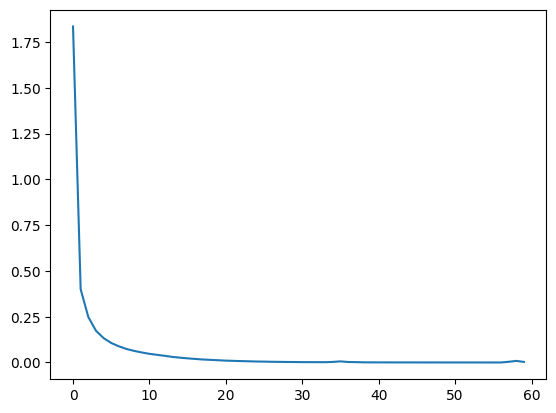

In [127]:
plt.plot(history1.history['loss'])

In [130]:
model.evaluate(encoder.predict(val_data), val_labels)

119/119 [==============================] - 0s 265us/step - loss: 0.1339 - accuracy: 0.9765


[0.13393719494342804, 0.9765480756759644]